### Importación de datos



In [21]:
#IMPORTS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:


url0 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
urls = [url0,url1,url2,url3]
tiendas = [pd.read_csv(url) for url in urls]
tiendas[0].head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [23]:
#Calcular ingreso total de cada tienda
ingresos = [] 
for tienda in tiendas:
    ingresos.append(sum(tienda['Precio']))
ingresos

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

Text(0, 0.5, 'Número de ingrsos')

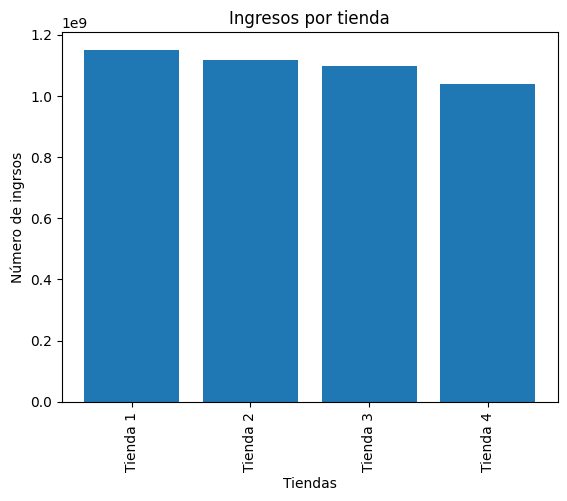

In [24]:
labelsTiendas = ["Tienda 1","Tienda 2","Tienda 3", "Tienda 4"]

plt.bar(labelsTiendas, ingresos)
plt.xticks(rotation=90)
plt.title(f"Ingresos por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Número de ingrsos")

# 2. Ventas por categoría

Lista de diccionarios : 
dict_items([('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Deportes y diversión', 284), ('Instrumentos musicales', 182), ('Libros', 173), ('Artículos para el hogar', 171)])


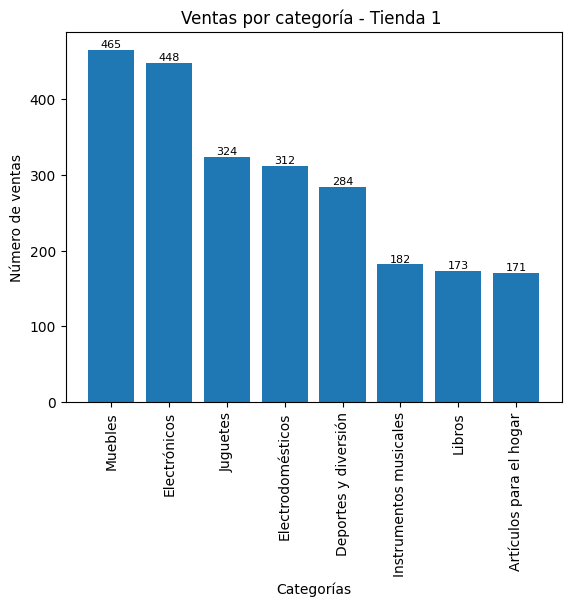

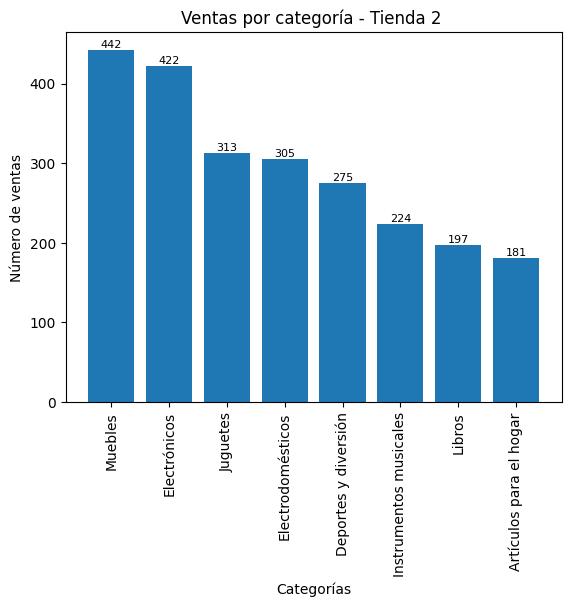

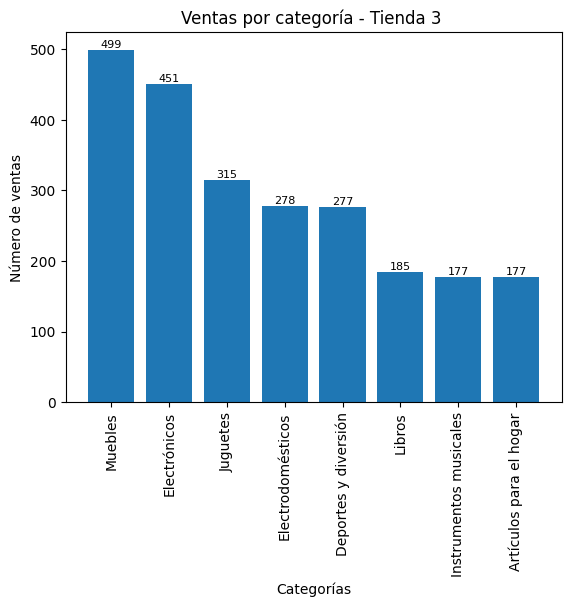

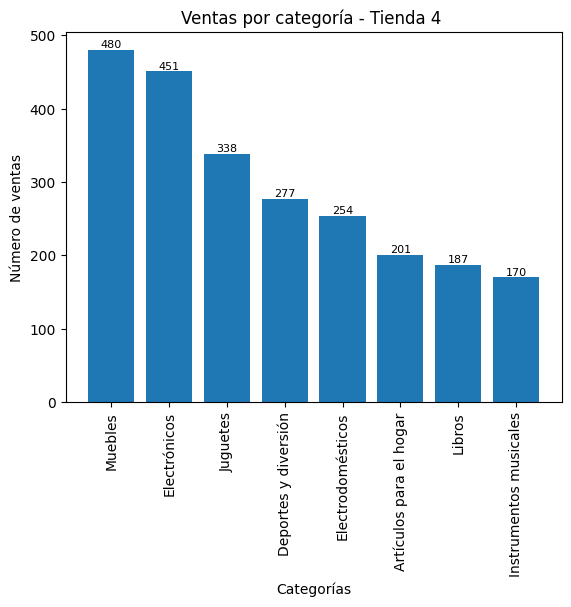

[2359, 2359, 2359, 2358]


"\nimport matplotlib.pyplot as plt\n\nD = {u'Label1':26, u'Label2': 17, u'Label3':30}\nplt.bar(*zip(*D.items())) \nplt.show()\n"

In [27]:
#cantidad de productos vendidos por categoría, mostrar de mayor a menor por tienda, para ver la cateoría más popular en cada tienda

#una lista de diccionarios, donde cada diccionario tiene las categorías y cantidad de ventas en 1 tienda, entonces necesitas una lista para tener las 4 tiendas
categoria = []
total_ventas = []

for tienda in tiendas:
    diccionario = {}
    for tipo_producto in tienda['Categoría del Producto']:
        if tipo_producto in diccionario:
            diccionario[tipo_producto] += 1
        else:
            diccionario[tipo_producto]=1
    diccionario_descendente = sorted(diccionario.items(), key=lambda x:x[1], reverse=True) #en lo del key va el criterio bajo el que se va a ordenar, en este caso es de acuerdo al valor del diccionario que está en la posición 1 (lo de lambda y eso es solo una función anónima)
    total_ventas.append(sum(list(diccionario.values())))
    categoria.append(dict(diccionario_descendente))

   #print(f'{tienda} \n')
print("Lista de diccionarios : ")
#print(categoria)

#print(tiendas.columns) para ver los nombres de las columnas
print(categoria[0].items()) #el items te da tuplas hechas de key y valor
#con zip(*tupla) pones los valores en listas, las categorias en una y sus repeticiones en otra

for  i, categoria_grafica in enumerate(categoria):
    categorias, valores = zip(*categoria_grafica.items())
    plt.bar(categorias, valores)
    plt.xticks(rotation=90)
    plt.title(f"Ventas por categoría - Tienda {i+1} ")
    plt.xlabel("Categorías")
    plt.ylabel("Número de ventas")
    
    for x, y in zip(categorias, valores):
        plt.text(x, y + 0.2, str(y), ha='center', va='bottom', fontsize=8)

    plt.show()
print(total_ventas)
'''
import matplotlib.pyplot as plt

D = {u'Label1':26, u'Label2': 17, u'Label3':30}
plt.bar(*zip(*D.items())) 
plt.show()
'''

# 3. Calificación promedio de la tienda


In [ ]:
calificaciones = []
for tienda in tiendas:
    calificaciones.append(np.mean(tienda['Calificación']))

print("Calificaciones promedio por tienda:")
print(calificaciones)

Calificaciones promedio por tienda:
[np.float64(3.976685036032217), np.float64(4.037303942348453), np.float64(4.048325561678677), np.float64(3.9957591178965224)]


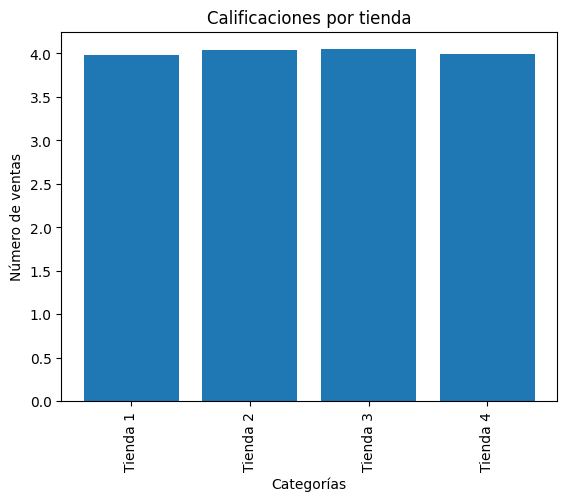

In [ ]:
labelsTiendas = ["Tienda 1","Tienda 2","Tienda 3", "Tienda 4"]

plt.bar(labelsTiendas, calificaciones)
plt.xticks(rotation=90)
plt.title(f"Calificaciones por tienda")
plt.xlabel("Categorías")
plt.ylabel("Número de ventas")
    
    

plt.show()

# 4. Productos más y menos vendidos

Lista de diccionarios : 
dict_items([('Microondas', 59), ('TV LED UHD 4K', 59), ('Armario', 59), ('Secadora de ropa', 57), ('Bloques de construcción', 55), ('Mesa de noche', 55), ('Balón de baloncesto', 54), ('Refrigerador', 53), ('Bicicleta', 53), ('Vaso térmico', 53), ('Impresora', 53), ('Batería', 52), ('Carrito de control remoto', 51), ('Cubertería', 51), ('Modelado predictivo', 50), ('Auriculares', 49), ('Ajedrez de madera', 48), ('Iphone 15', 48), ('Lavavajillas', 47), ('Lavadora de ropa', 46), ('Guitarra eléctrica', 46), ('Silla de oficina', 45), ('Sofá reclinable', 45), ('Guitarra acústica', 45), ('Estufa', 44), ('Kit de bancas', 43), ('Cama box', 43), ('Cubo mágico 8x8', 43), ('Mesa de centro', 43), ('Cama king', 43), ('Smart TV', 43), ('Juego de mesa', 42), ('Set de ollas', 42), ('Smartwatch', 42), ('Balón de voleibol', 41), ('Dashboards con Power BI', 41), ('Tablet ABXY', 41), ('Set de vasos', 40), ('Sillón', 40), ('Iniciando en programación', 40), ('Asistente virtual', 39),

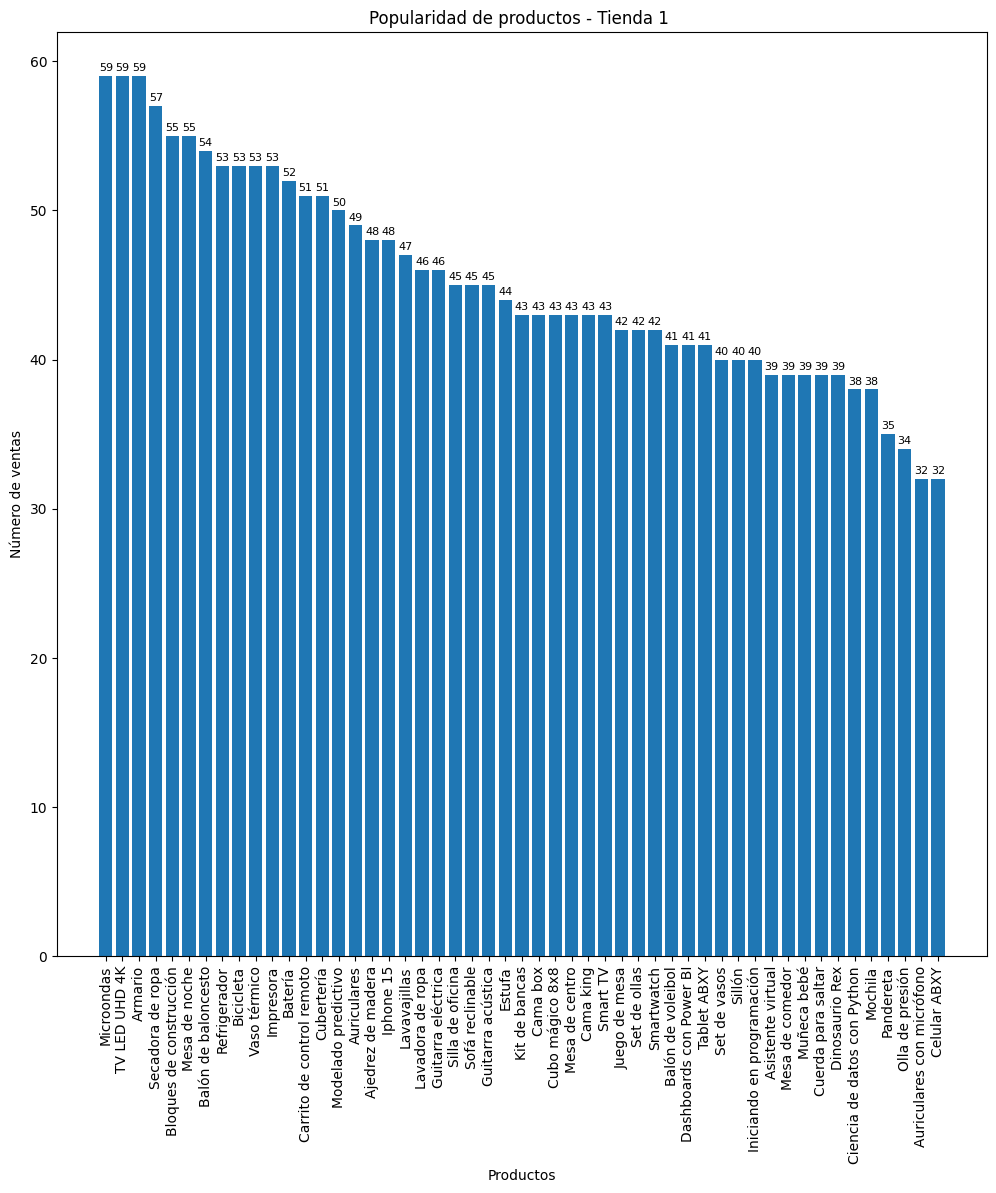

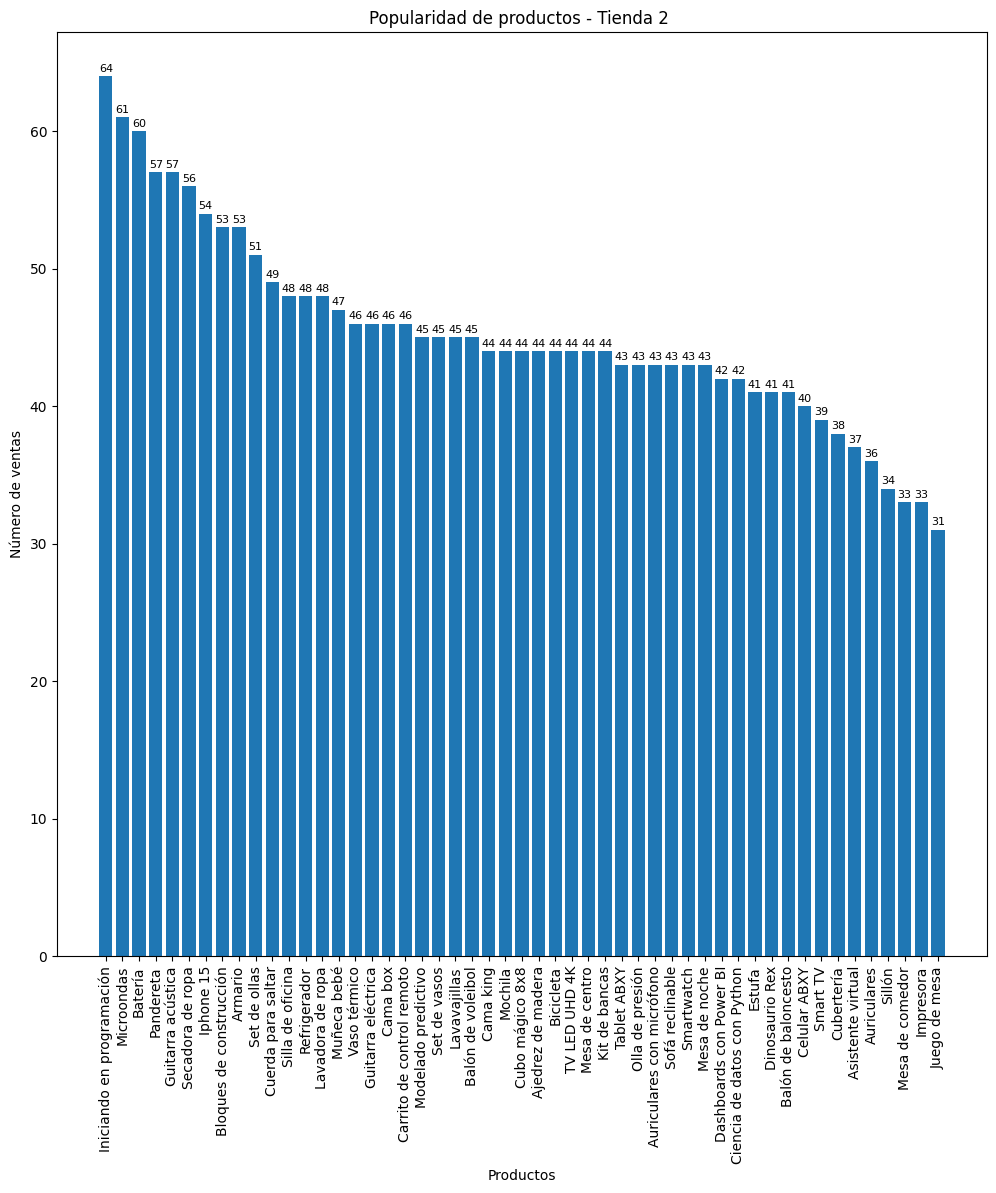

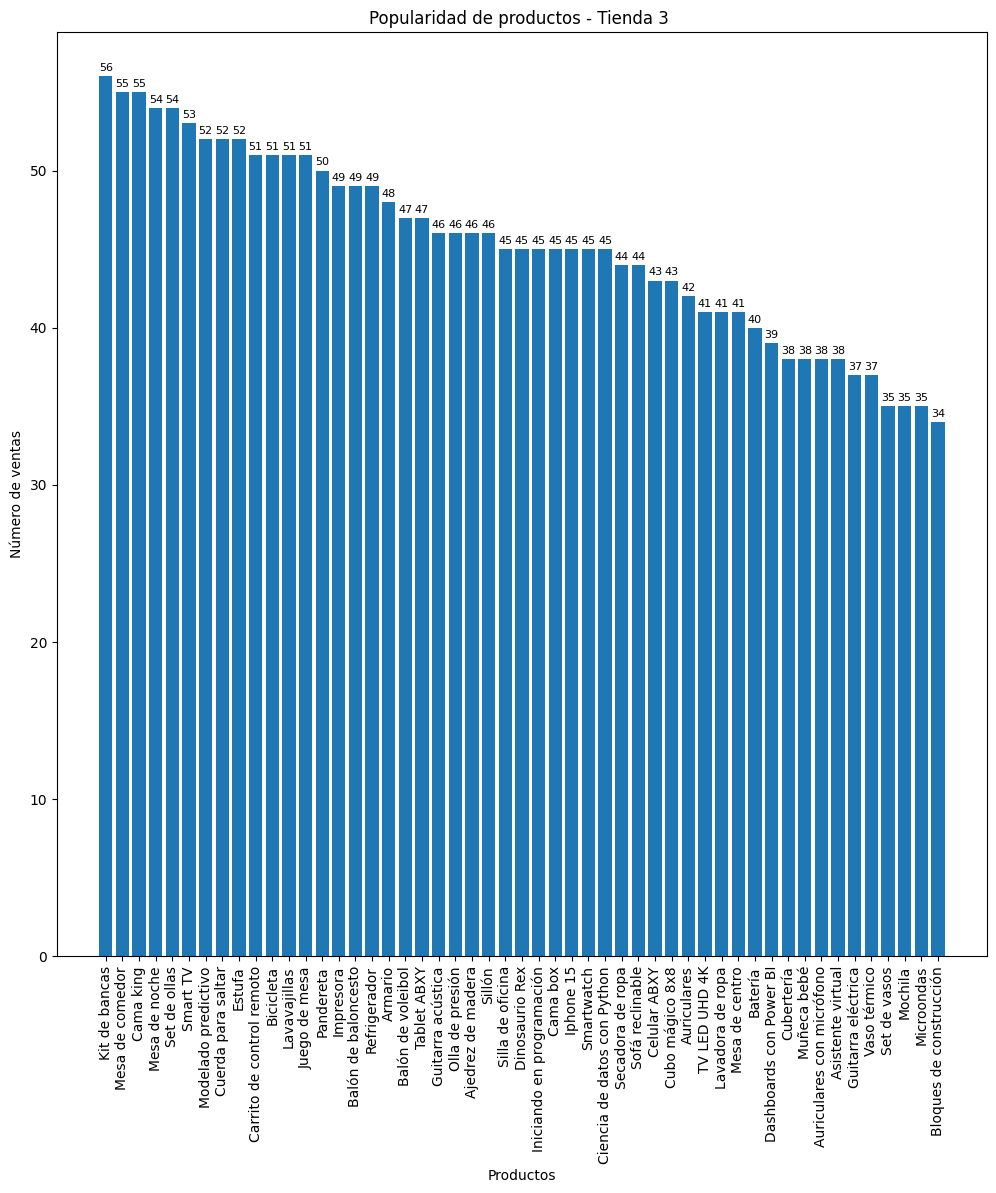

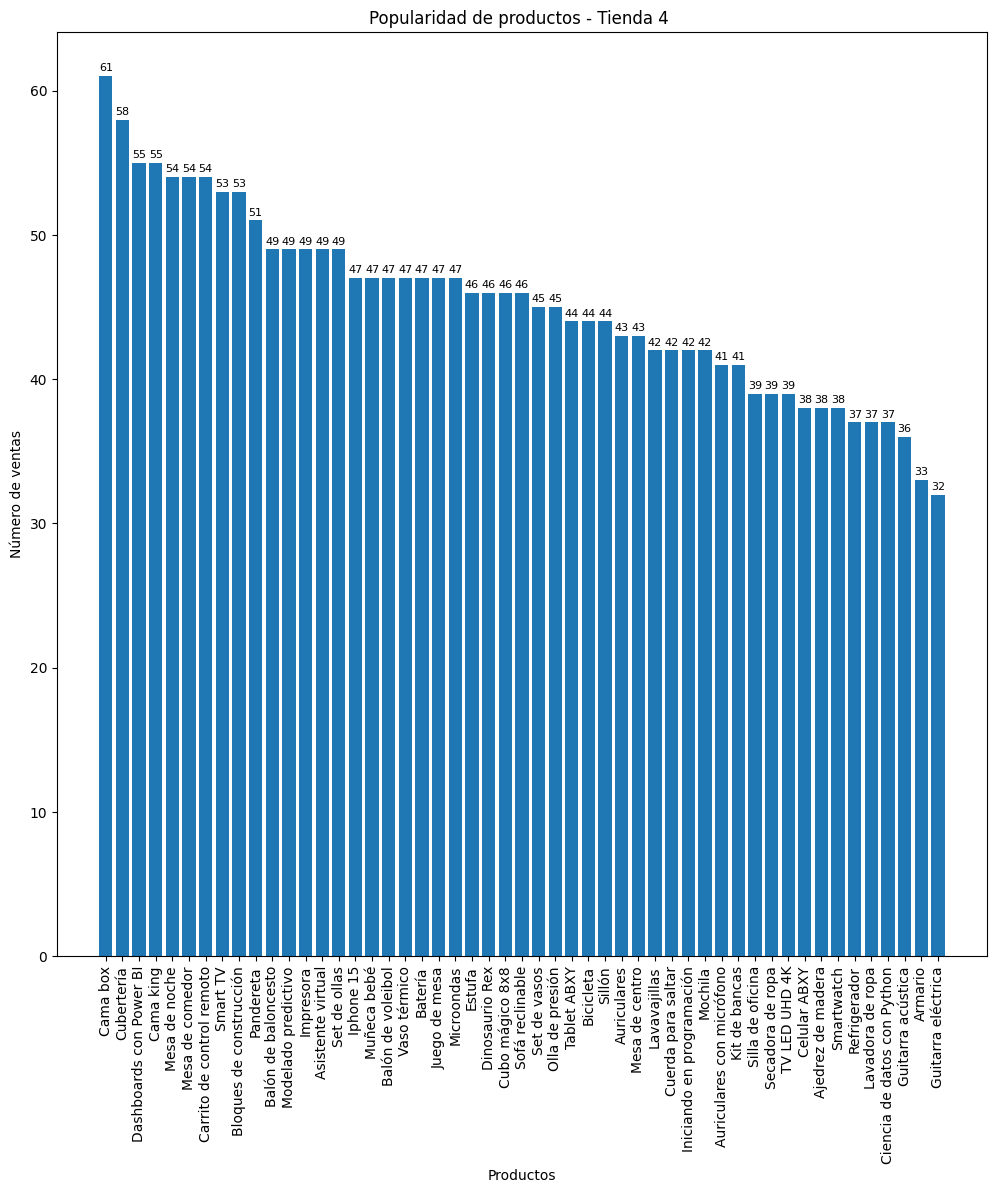

In [ ]:
vendidos = []
for tienda in tiendas:
    diccionario = {}
    for producto in tienda['Producto']:
        if producto in diccionario:
            diccionario[producto] += 1
        else:
            diccionario[producto]=0
    diccionario_descendente = sorted(diccionario.items(), key=lambda x:x[1], reverse=True) #en lo del key va el criterio bajo el que se va a ordenar, en este caso es de acuerdo al valor del diccionario que está en la posición 1 (lo de lambda y eso es solo una función anónima)
 
    vendidos.append(dict(diccionario_descendente))
   #print(f'{tienda} \n')
print("Lista de diccionarios : ")
#print(categoria)

#print(tiendas.columns) para ver los nombres de las columnas
print(vendidos[0].items()) #el items te da tuplas hechas de key y valor
#con zip(*tupla) pones los valores en listas, las categorias en una y sus repeticiones en otra

for  i, vendidos_grafica in enumerate(vendidos):
    vendidos, valores = zip(*vendidos_grafica.items())
    plt.figure(figsize=(12,12))
    plt.bar(vendidos, valores)
    plt.xticks(rotation=90)
    plt.title(f"Popularidad de productos - Tienda {i+1} ")
    plt.xlabel("Productos")
    plt.ylabel("Número de ventas")
    
    for x, y in zip(vendidos, valores):
        plt.text(x, y + 0.2, str(y), ha='center', va='bottom', fontsize=8)
    
    
    plt.show()

# 5. Envío promedio por tienda

In [ ]:
envios = []

for tienda in tiendas:
    envios.append(np.mean(tienda['Costo de envío']))


[np.float64(26018.60958033065), np.float64(25216.235693090293), np.float64(24805.680373039424), np.float64(23459.457167090754)]


### Decisión final
Tras evaluar todo se recomienda cerrar la Tienda 4 porque es la que menos dinero ha ganado de todas. Aunque sus envíos son un poco más baratos y su calificación es por muy poco la segunda tienda con menor calificación, no vende tanto como las otras, y eso hace que sea menos rentable. También es la que menos productos ha vendido, aunque por muy poco. En resumen, es la tienda que menos aporta al negocio, por lo que sería la mejor opción para cerrar.
